In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
willianoliveiragibin_10000_data_about_movies_1915_2023_path = kagglehub.dataset_download('willianoliveiragibin/10000-data-about-movies-1915-2023')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10000-data-about-movies-1915-2023/LICENSE
/kaggle/input/10000-data-about-movies-1915-2023/README.md
/kaggle/input/10000-data-about-movies-1915-2023/scraper.ipynb
/kaggle/input/10000-data-about-movies-1915-2023/data.csv


In [ ]:
df=pd.read_csv('/kaggle/input/10000-data-about-movies-1915-2023/data.csv')
df.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [ ]:
df.columns

Index(['Unnamed: 0', 'Movie Name', 'Year of Release', 'Run Time in minutes',
       'Movie Rating', 'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification',
       'Director', 'Stars', 'Description'],
      dtype='object')

In [ ]:
df.rename(columns={'Unnamed: 0':'unnamed'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [ ]:
df.describe()

,unnamed,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,7974.000000,7.085000e+03
mean,4999.50000,2001.413600,110.725000,6.727020,9.279738e+04,59.171432,4.017500e+07
std,2886.89568,18.597804,22.053073,0.821264,1.716509e+05,17.268795,6.748658e+07
min,0.00000,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00
25%,2499.75000,1994.000000,96.000000,6.100000,1.685175e+04,47.000000,2.340000e+06
50%,4999.50000,2007.000000,107.000000,6.700000,3.417950e+04,60.000000,1.693000e+07
75%,7499.25000,2015.000000,121.000000,7.300000,9.154600e+04,72.000000,4.864000e+07
max,9999.00000,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08


In [ ]:
nan_meta=df['MetaScore'].isna().sum()
nan_gross=df['Gross'].isna().sum()
nan_certi=df['Certification'].isna().sum()
print(nan_meta,nan_gross,nan_certi)

In [ ]:
df['Genre'].value_counts()

Genre
['Comedy', ' Drama', ' Romance']    481
['Drama']                           429
['Comedy', ' Drama']                406
['Drama', ' Romance']               347
['Action', ' Crime', ' Drama']      324
                                   ... 
['Thriller', ' War']                  1
['Romance', ' Thriller', ' War']      1
['Adventure', ' Family']              1
['Drama', ' Horror', ' Western']      1
['Mystery', ' Sci-Fi']                1
Name: count, Length: 425, dtype: int64

In [ ]:
df['Director'].value_counts()

Director
['Woody Allen']                                                                                           47
['Clint Eastwood']                                                                                        37
['Alfred Hitchcock']                                                                                      37
['Steven Spielberg']                                                                                      33
['Ridley Scott']                                                                                          27
                                                                                                          ..
['William Cottrell', 'David Hand', 'Wilfred Jackson', 'Larry Morey', 'Perce Pearce', 'Ben Sharpsteen']     1
['Richard Wong']                                                                                           1
['Eric Summer', 'Éric Warin']                                                                              1
['Patrick 

In [ ]:
df['MetaScore'].median()
len(df['MetaScore'])

In [ ]:
def find_median(seri):
    result=0
    length=len(seri)
    if len(seri)%2==0:
        result=(seri[length/2]+seri[length/2+1])/2
    else:
        result =seri[length]
    return result

print(find_median(df['MetaScore']))

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
df['MetaScore'].plot(kind='line',color='red')
plt.xlabel('index')
plt.ylabel('Meta Score')
plt.subplot(2,1,2)
df['Votes'].plot(kind='line',color='green')
plt.xlabel('index')
plt.ylabel('Votes')

In [ ]:
df.describe()

In [ ]:
q1=df['MetaScore'].quantile(0.25)
q3=df['MetaScore'].quantile(0.75)
top_border=q3+(1.5*(q3-q1))
bottom_border=q1-(1.5*(q3-q1))

In [ ]:
outlier=df[(df['MetaScore']<bottom_border)&(df['MetaScore']>top_border)]

In [ ]:
df.boxplot(column='MetaScore',by='Certification')
plt.show()

In [ ]:
new_data=df.iloc[0:200,:]
melted=pd.melt(frame=new_data,id_vars='Movie Name',value_vars=['Gross','MetaScore'])

In [ ]:
melted.loc[melted['variable']=='Gross']

,Movie Name,variable,value
0,The Shawshank Redemption,Gross,28340000.0
1,The Godfather,Gross,134970000.0
2,Ramayana: The Legend of Prince Rama,Gross,NaN
3,The Chaos Class,Gross,NaN
4,The Dark Knight,Gross,534860000.0
...,...,...,...
195,Kantara,Gross,NaN
196,The Young and the Damned,Gross,NaN
197,To Live,Gross,2330000.0
198,Shershaah,Gross,NaN


In [ ]:
melted.pivot(index='Movie Name',columns='variable',values='value')

variable,Gross,MetaScore
Movie Name,,
#Home,NaN,NaN
12 Angry Men,4360000.0,97.0
2001: A Space Odyssey,56950000.0,84.0
3 Idiots,6530000.0,67.0
777 Charlie,NaN,NaN
...,...,...
Woman in the Dunes,NaN,NaN
Your Name.,5020000.0,81.0
Zübük,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [ ]:
df['Movie Rating']=df['Movie Rating'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  int64  
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1015.8+ KB


In [ ]:
df.isna().sum()

Unnamed: 0                0
Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64

In [ ]:
df['MetaScore'].value_counts(dropna=False)

MetaScore
NaN     2026
61.0     187
65.0     185
66.0     183
68.0     176
        ... 
12.0       3
15.0       3
10.0       1
9.0        1
7.0        1
Name: count, Length: 94, dtype: int64

In [ ]:
df['MetaScore'].dropna(inplace=True)
df.MetaScore.isna().sum()

2026

In [ ]:
assert df.MetaScore.notnull().all()

In [ ]:
df['MetaScore'].fillna('bos',inplace=True)

In [ ]:
df['MetaScore'].head()

0     82.0
1    100.0
2      bos
3      bos
4     84.0
Name: MetaScore, dtype: object

In [ ]:
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
zipped

[('country', ['Spain', 'France']), ('population', ['11', '12'])]

In [ ]:
li1=['Fruit','Weight']
li2=[['Apple','Orange','Banana'],['3.2','5.4','6.5']]
new_dict=dict(zip(li1,li2))
new_dict_df=pd.DataFrame(new_dict)
new_dict_df

,Fruit,Weight
0,Apple,3.2
1,Orange,5.4
2,Banana,6.5


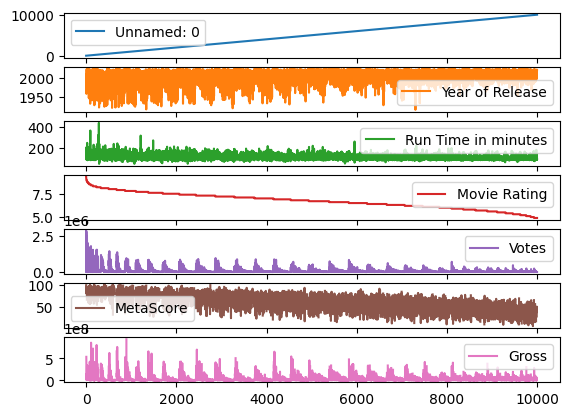

In [ ]:
import matplotlib.pyplot as plt
df.plot(subplots=True)
plt.show()

<Axes: ylabel='Frequency'>

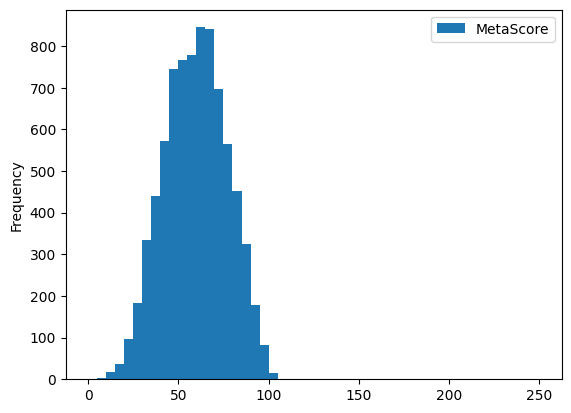

In [ ]:
df.plot(kind='hist',y='MetaScore',bins=50,range=(0,250))

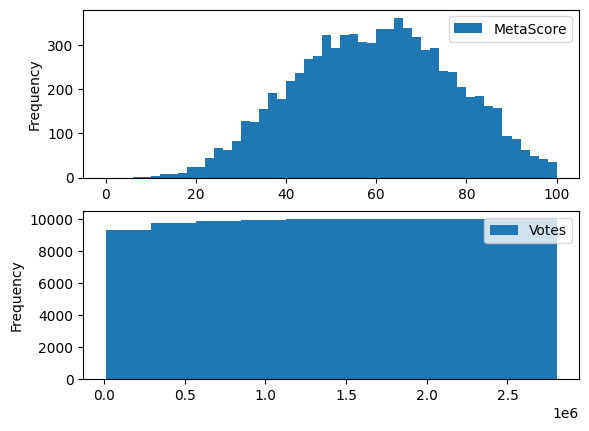

In [ ]:
figs,axes=plt.subplots(nrows=2,ncols=1)
df.plot(kind='hist',y='MetaScore',bins=50,range=(0,100),ax=axes[0])
df.plot(kind='hist',y='Votes',ax=axes[1],cumulative=True)
plt.savefig('filmdata.png')
plt.show()

<Axes: ylabel='Frequency'>

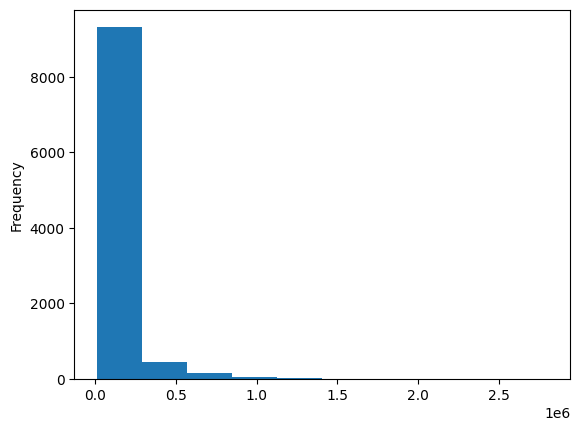

In [ ]:
df.Votes.plot(kind='hist')

In [ ]:
data=df.head().copy()
date_time=["1999-11-09","1999-11-08","1999-12-07","2000-10-06","2001-10-03"]
date_time=pd.to_datetime(date_time)
data['date']=date_time
data=data.set_index('date')
data

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
date,,,,,,,,,,,,,
1999-11-09,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1999-11-08,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
1999-12-07,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
2000-10-06,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
2001-10-03,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [ ]:
data.resample('M').sum()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
date,,,,,,,,,,,,,
1999-11-30,1,The GodfatherThe Shawshank Redemption,3966,317,18.5,4758617,182.0,163310000.0,"['Crime', ' Drama']['Drama']",RR,['Francis Ford Coppola']['Frank Darabont'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
1999-12-31,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,0.0,0.0,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
2000-01-31,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0
2000-02-29,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0
2000-03-31,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0
2000-04-30,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0
2000-05-31,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0
2000-06-30,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0
2000-07-31,0,0,0,0,0.0,0,0.0,0.0,0,0,0,0,0


In [ ]:
data.resample('M').first().interpolate('linear')

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
date,,,,,,,,,,,,,
1999-11-30,1.000000,The Godfather,1972.00,175.000000,9.200000,1.954174e+06,100.000000,1.349700e+08,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
1999-12-31,2.000000,Ramayana: The Legend of Prince Rama,1993.00,135.000000,9.200000,1.299500e+04,99.304348,1.523565e+08,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
2000-01-31,2.100000,None,1991.20,130.200000,9.200000,1.591860e+04,98.608696,1.697430e+08,None,None,None,None,None
2000-02-29,2.200000,None,1989.40,125.400000,9.200000,1.884220e+04,97.913043,1.871296e+08,None,None,None,None,None
2000-03-31,2.300000,None,1987.60,120.600000,9.200000,2.176580e+04,97.217391,2.045161e+08,None,None,None,None,None
2000-04-30,2.400000,None,1985.80,115.800000,9.200000,2.468940e+04,96.521739,2.219026e+08,None,None,None,None,None
2000-05-31,2.500000,None,1984.00,111.000000,9.200000,2.761300e+04,95.826087,2.392891e+08,None,None,None,None,None
2000-06-30,2.600000,None,1982.20,106.200000,9.200000,3.053660e+04,95.130435,2.566757e+08,None,None,None,None,None
2000-07-31,2.700000,None,1980.40,101.400000,9.200000,3.346020e+04,94.434783,2.740622e+08,None,None,None,None,None


In [ ]:
df.rename(columns={'Unnamed: 0':'unnamed'},inplace=True)
df.columns

Index(['unnamed', 'Movie Name', 'Year of Release', 'Run Time in minutes',
       'Movie Rating', 'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification',
       'Director', 'Stars', 'Description'],
      dtype='object')

In [ ]:
df=df.set_index('unnamed')
df.head()

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
unnamed,,,,,,,,,,,,
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
